<a href="https://colab.research.google.com/github/EsraaMosaad/NTI_training/blob/main/covid19_xray_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import glob
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout,Conv2D, MaxPooling2D, Flatten
import tensorflow as tf
from sklearn.metrics import accuracy_score,  confusion_matrix

# **Download Data**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!cp /content/drive/MyDrive/Colab_Notebooks/kaggle_API_credentials/kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# data from 'kaggle kernels output kerneler/starter-covid-19-xray-image-778aac6f-1 -p /path/to/dest'

In [ ]:
!kaggle datasets download -d onuigwevitus/covid19-xray-image-classification
! unzip /content/covid19-xray-image-classification.zip

# **Read Data**

In [ ]:
file='/content/COVID-19/COVID19/dataset/covid/*'
glob.glob(file)
covid_images=[cv2.imread(image,cv2.IMREAD_GRAYSCALE) for image in glob.glob(file)]

In [ ]:
file='/content/COVID-19/COVID19/dataset/normal/*'
glob.glob(file)
normal_images=[cv2.imread(image,cv2.IMREAD_GRAYSCALE) for image in glob.glob(file)]

# **Resize & Show image**

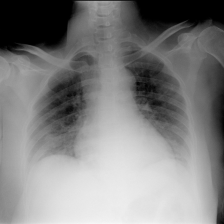

(1262, 1261) (224, 224) COVID


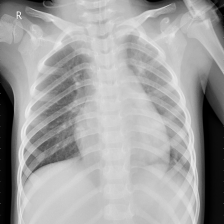

(1264, 1392) (224, 224) NORMAL


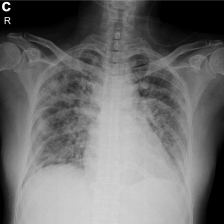

(1165, 1165) (224, 224) COVID


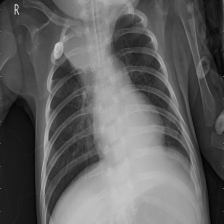

(624, 1112) (224, 224) NORMAL


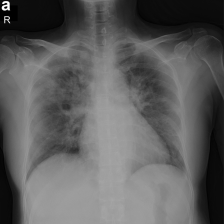

(1163, 1165) (224, 224) COVID


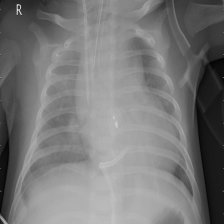

(616, 976) (224, 224) NORMAL


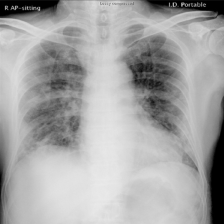

(1330, 1187) (224, 224) COVID


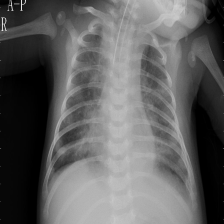

(792, 1264) (224, 224) NORMAL


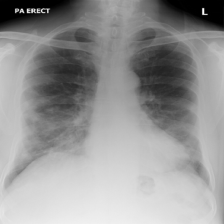

(1333, 1118) (224, 224) COVID


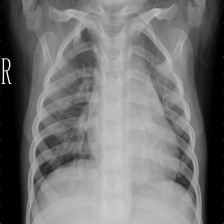

(840, 1480) (224, 224) NORMAL


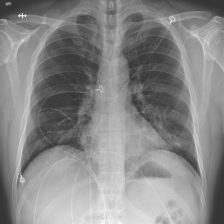

(1439, 1800) (224, 224) COVID


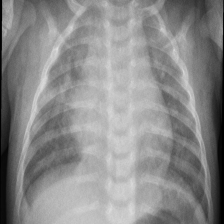

(594, 947) (224, 224) NORMAL


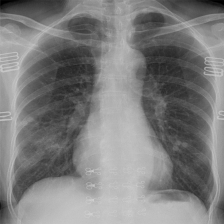

(4095, 3342) (224, 224) COVID


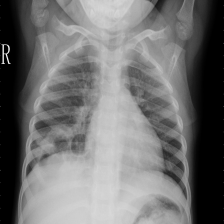

(1104, 1584) (224, 224) NORMAL


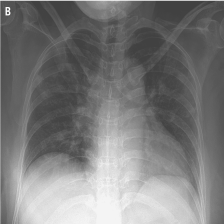

(1308, 1652) (224, 224) COVID


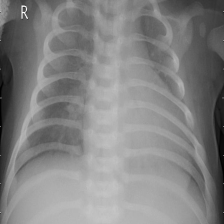

(488, 760) (224, 224) NORMAL


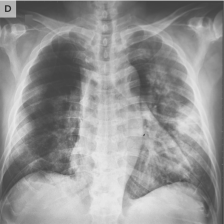

(874, 880) (224, 224) COVID


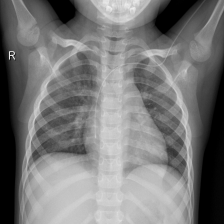

(1708, 1944) (224, 224) NORMAL


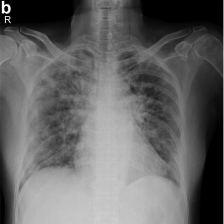

(1161, 1170) (224, 224) COVID


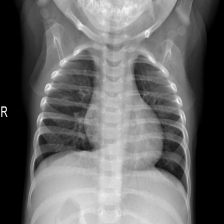

(1063, 1534) (224, 224) NORMAL


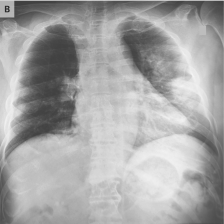

(891, 880) (224, 224) COVID


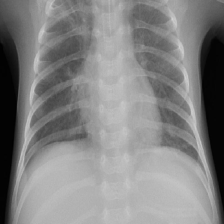

(490, 821) (224, 224) NORMAL


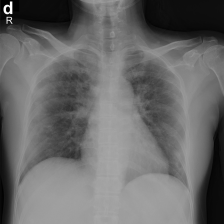

(1161, 1166) (224, 224) COVID


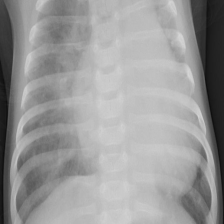

(463, 827) (224, 224) NORMAL


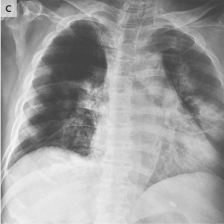

(876, 882) (224, 224) COVID


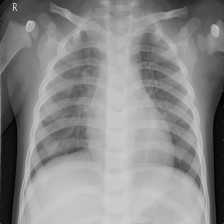

(840, 1240) (224, 224) NORMAL


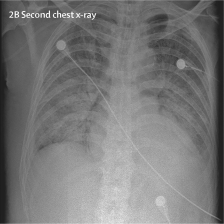

(1412, 1404) (224, 224) COVID


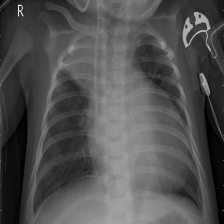

(560, 904) (224, 224) NORMAL


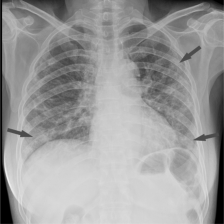

(1343, 1300) (224, 224) COVID


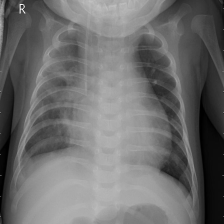

(672, 832) (224, 224) NORMAL


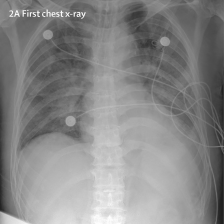

(1402, 1401) (224, 224) COVID


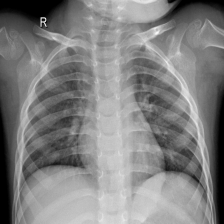

(1264, 1600) (224, 224) NORMAL


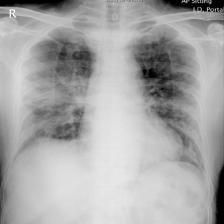

(1332, 1175) (224, 224) COVID


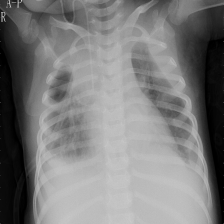

(1152, 1504) (224, 224) NORMAL


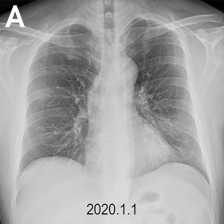

(630, 700) (224, 224) COVID


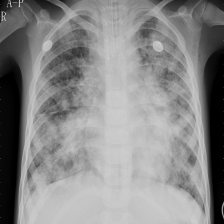

(1184, 1408) (224, 224) NORMAL


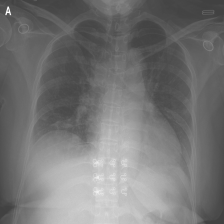

(1272, 1645) (224, 224) COVID


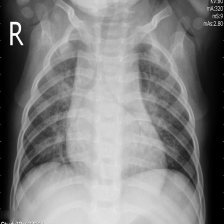

(832, 1112) (224, 224) NORMAL


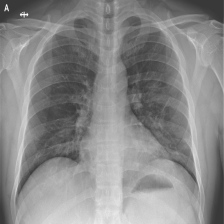

(841, 1107) (224, 224) COVID


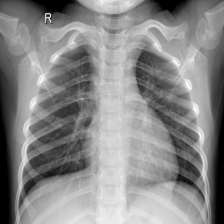

(1372, 1742) (224, 224) NORMAL


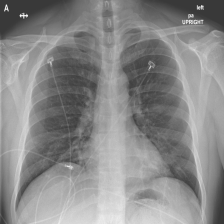

(874, 1104) (224, 224) COVID


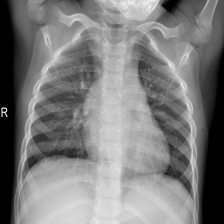

(1422, 1802) (224, 224) NORMAL


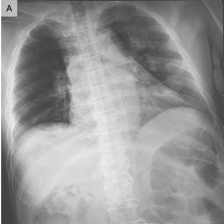

(888, 882) (224, 224) COVID


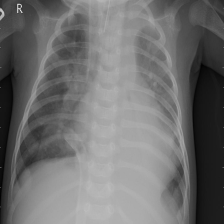

(704, 944) (224, 224) NORMAL


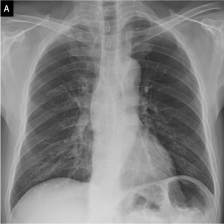

(1570, 1695) (224, 224) COVID


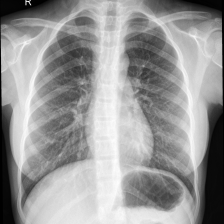

(1953, 2170) (224, 224) NORMAL


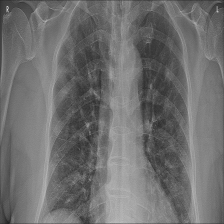

(1148, 2563) (224, 224) COVID


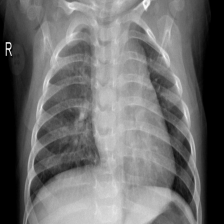

(770, 1442) (224, 224) NORMAL


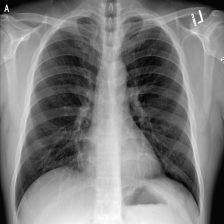

(842, 1090) (224, 224) COVID


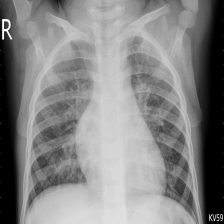

(952, 1432) (224, 224) NORMAL


In [ ]:

dim = (224, 224)
resized_covid_image=[]
resized_normal_image=[]
for i in range(len(covid_images)):
    #resize image
    resized_covid_image.append(cv2.resize(covid_images[i], dim, interpolation = cv2.INTER_AREA))
    resized_normal_image.append(cv2.resize(normal_images[i], dim, interpolation = cv2.INTER_AREA))
    #show image
    cv2_imshow(resized_covid_image[i])
    print(covid_images[i].shape, resized_covid_image[i].shape,"COVID")
    cv2_imshow(resized_normal_image[i])
    print(normal_images[i].shape, resized_normal_image[i].shape,"NORMAL")
normal_label=np.zeros(len(resized_normal_image))
covid_label=np.ones(len(resized_covid_image))
#covid label for 1


# split data

In [ ]:
x=resized_normal_image+resized_covid_image
y=np.concatenate((normal_label,covid_label))
df = pd.DataFrame(
    {'image':x,
     'label':y,
    })
df.sample(frac=1).reset_index(drop=True)

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.20)

x_train=np.array(x_train)
x_test=np.array(x_test)
x_train=x_train/255
x_test=x_test/255
# x_train_final = x_train.reshape((-1,224*224)) 
# x_test_final = x_test.reshape((-1,224*224)) 

# **Build Model**

In [ ]:
model=Sequential() #Create a network sequence.

model.add(Input(shape=(224,224,1)))
model.add(Conv2D(6, (5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.30))
model.add(Conv2D(10, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(10, (3, 3), activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(212, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 220, 220, 6)       156       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 73, 73, 6)        0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 73, 73, 6)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 10)        550       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 10)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 23, 23, 10)       

# **Train Model**

In [ ]:
model.compile(tf.keras.optimizers.Adamax(learning_rate=.001),loss="binary_crossentropy",metrics=['accuracy']) 
results= model.fit(x_train,y_train,epochs=16,validation_data=(x_test, y_test))


Epoch 1/16
2/2 [==============================] - 1s 183ms/step - loss: 0.9990 - accuracy: 0.5000 - val_loss: 0.6869 - val_accuracy: 0.5000
Epoch 2/16
2/2 [==============================] - 0s 30ms/step - loss: 0.9126 - accuracy: 0.5750 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 3/16
2/2 [==============================] - 0s 29ms/step - loss: 0.7159 - accuracy: 0.5000 - val_loss: 0.6955 - val_accuracy: 0.5000
Epoch 4/16
2/2 [==============================] - 0s 29ms/step - loss: 0.7289 - accuracy: 0.5000 - val_loss: 0.6858 - val_accuracy: 0.5000
Epoch 5/16
2/2 [==============================] - 0s 29ms/step - loss: 0.5966 - accuracy: 0.7750 - val_loss: 0.6798 - val_accuracy: 0.9000
Epoch 6/16
2/2 [==============================] - 0s 31ms/step - loss: 0.5748 - accuracy: 0.8000 - val_loss: 0.6761 - val_accuracy: 0.8000
Epoch 7/16
2/2 [==============================] - 0s 29ms/step - loss: 0.5941 - accuracy: 0.5750 - val_loss: 0.6736 - val_accuracy: 0.5000
Epoch 8/16
2/2 [==========

# **Evaluate model**

In [ ]:
pred=model.predict(x_test)
y_pred=((pred>=0.5).astype(int))

print(confusion_matrix(y_test,y_pred))

accuracy_score(y_test,y_pred)*100



[[4 1]
 [0 5]]


90.0

# plot loss 

Text(0, 0.5, 'losses')

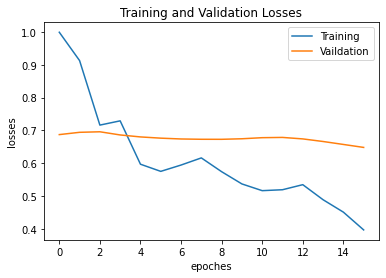

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Losses')
plt.xlabel('epoches')
plt.ylabel('losses')

# **plot accuracy**

Text(0, 0.5, 'accuracy')

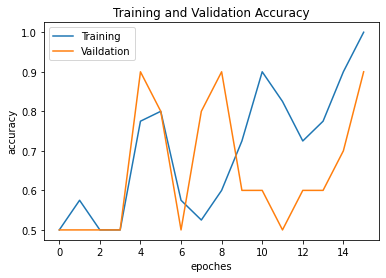

In [ ]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training','Vaildation'])
plt.title('Training and Validation Accuracy')
plt.xlabel('epoches')
plt.ylabel('accuracy')

**Save Model as '.h5' file **

In [ ]:
# model.save("/content/drive/MyDrive/saving_model/cvoid19_90%.h5")